<a href="https://colab.research.google.com/github/bharatb010699/Earthquake-Forecasting/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Correlations Between Features
This section focuses on finding out whether there is any group of 2 or more features which are strongly correlated, such that we can choose only one feature from that particular group and hence achieve computational efficiency without compromising with the results.


---



In [1]:
!git clone "https://github.com/bharatb010699/Earthquake-Forecasting.git"

Cloning into 'Earthquake-Forecasting'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 8), reused 10 (delta 3), pack-reused 0
Unpacking objects: 100% (22/22), done.


Import the libraries required

In [0]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpl_toolkits
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
df = pd.read_csv('./Earthquake-Forecasting/final_data.csv')

Viewing the first **five** rows of the pre-processed dataset

In [4]:
df.head()

,timestamp,latitude,longitude,mag,depth,place
0,1.585583e+09,36.6765,71.0957,4.9,214.05,"31km SE of Jarm, Afghanistan"
1,1.585506e+09,32.9731,76.4202,4.3,10.00,"52km NNE of Chamba, India"
2,1.585381e+09,36.7514,71.3490,4.4,176.53,"18km WNW of Ashkasham, Afghanistan"
3,1.585359e+09,37.5638,72.4376,4.3,196.81,"63km ENE of Roshtqal'a, Tajikistan"
4,1.585310e+09,32.6970,76.1440,4.5,10.00,"14km N of Chamba, India"


Calculating some statistical data like **percentile**, **mean** and **standard deviation** of the numerical values of the series or "DataFrame"

In [5]:
df.describe()

,timestamp,latitude,longitude,mag,depth
count,1.757600e+04,17576.000000,17576.000000,17576.000000,17576.000000
mean,9.636736e+08,34.835402,78.295308,4.388052,72.734639
std,4.293001e+08,3.713914,8.930387,0.553238,70.078494
min,-1.553274e+09,25.000000,70.000000,2.900000,0.000000
25%,6.934798e+08,32.856000,71.263000,4.000000,22.300000
50%,1.071531e+09,36.309000,73.599500,4.400000,33.000000
75%,1.242766e+09,37.178250,84.926650,4.700000,114.000000
max,1.585583e+09,39.999000,99.999000,8.600000,400.570000


Plotting the number of earthquakes as a function of magnitude

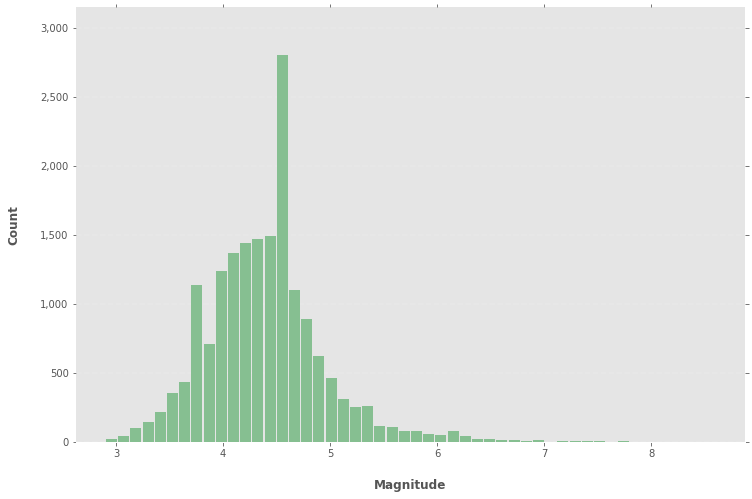

In [6]:
ax = df.hist(column='mag', bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Magnitude", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,g}'))

In [0]:
from pandas.plotting import scatter_matrix

Finding correlation among the columns using **Pearson** method

,timestamp,latitude,longitude,mag,depth
timestamp,1.000000,0.003237,-0.033868,-0.333159,0.005785
latitude,0.003237,1.000000,-0.678948,-0.086540,0.299858
longitude,-0.033868,-0.678948,1.000000,0.148020,-0.488284
mag,-0.333159,-0.086540,0.148020,1.000000,-0.095689
depth,0.005785,0.299858,-0.488284,-0.095689,1.000000


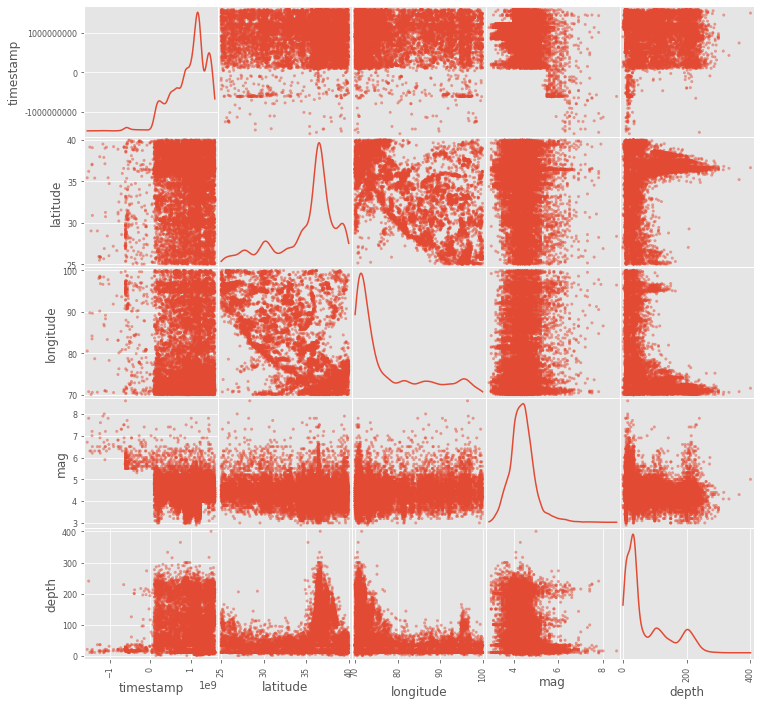

In [8]:
axs = scatter_matrix(df, figsize=(12,12), diagonal='kde')
df.corr(method = 'pearson')